### Tutorial of Relevance Based CAM

In [1]:
import torch
import torchvision.models as models
import cv2
from relevance import Relevance_CAM
import ssl
from image_net_labels import imgclasses 
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision import transforms
from PIL import Image
ssl._create_default_https_context = ssl._create_unverified_context


### Load the model - Testing Resnet50

In [2]:
model = models.resnet50(weights='ResNet50_Weights.DEFAULT')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [128]:
#imagenet default transforms
transform = transforms.Compose([            
 transforms.Resize(256),                    
 transforms.CenterCrop(224),                
 transforms.ToTensor(),                     
 transforms.Normalize(                      
 mean=[0.485, 0.456, 0.406],                
 std=[0.229, 0.224, 0.225]                  
 )])

Load an example image

In [129]:
image = Image.open("example.jpg") #image taken from RelevaceCAM official repo
img_t = transform(image)
batch_t = torch.unsqueeze(img_t, 0)


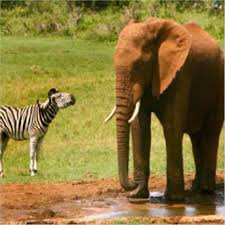

In [130]:
image

The image above is of a Tusker and Zebra
- Tusker class number in ImageNet is 101
- Zebra class number in ImageNet is 340

**CAM for class Tusker**

In [141]:
class_index = 101

In [142]:
rcam = Relevance_CAM(model=model,class_dict=imgclasses)
relevancy_cam,score = rcam.relevancy(-3,batch_t,class_index,plot=False)
predictions = torch.topk(score,5)
for i,predicted in enumerate(predictions[1]):
    print(f"Class {imgclasses[predicted.item()]} predicted with probability {predictions[0][i]}")

Class tusker predicted with probability 0.08306790143251419
Class African elephant, Loxodonta africana predicted with probability 0.07466595619916916
Class zebra predicted with probability 0.019071023911237717
Class Indian elephant, Elephas maximus predicted with probability 0.012416229583323002
Class patas, hussar monkey, Erythrocebus patas predicted with probability 0.0022174594923853874


Plotting relevance based CAM for Tusker

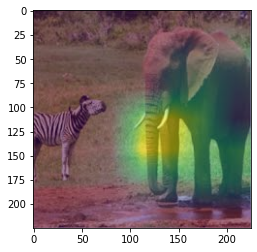

In [143]:
plt.imshow(image)
plt.imshow(cv2.resize(relevancy_cam,(image.size[0],image.size[1])),alpha=0.5)
plt.show()

**CAM for class Zebra**

In [144]:
class_index = 340

In [145]:
rcam = Relevance_CAM(model=model,class_dict=imgclasses)
relevancy_cam,score = rcam.relevancy(-3,batch_t,class_index,plot=False)
predictions = torch.topk(score,5)
for i,predicted in enumerate(predictions[1]):
    print(f"Class {imgclasses[predicted.item()]} predicted with probability {predictions[0][i]}")

Class tusker predicted with probability 0.08306790143251419
Class African elephant, Loxodonta africana predicted with probability 0.07466595619916916
Class zebra predicted with probability 0.019071023911237717
Class Indian elephant, Elephas maximus predicted with probability 0.012416229583323002
Class patas, hussar monkey, Erythrocebus patas predicted with probability 0.0022174594923853874


Plotting relevance based CAM for Zebra

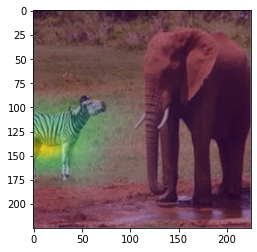

In [146]:
plt.imshow(image)
plt.imshow(cv2.resize(relevancy_cam,(image.size[0],image.size[1])),alpha=0.5)
plt.show()